In [1]:
from ULBC import *

In [2]:
R.<x, y> = RIF[]

In [3]:
Atomic(2*x + 3*y).p.derivative([x, y])

0

In [4]:
Atomic(2*x + 3*y).p.derivative(y)

3

In [5]:
Atomic(2*x + 3*y).vars.items()

[('x', x), ('y', y)]

In [6]:
Atomic(RIF(2,3)*x + 3*y).dpdt(vector([-y, x]))

3*x - 3.?*y

In [7]:
Atomic(2*x + 3*y).vars.values()

[x, y]

In [8]:
list(Atomic(2*x + 3*y).p)

[(2, x), (3, y)]

In [9]:
Atomic(2*x + 3*y).p.exponents()

[(1, 0), (0, 1)]

In [10]:
Atomic(2*x + 3*y).p.coefficients()

[2, 3]

In [11]:
Atomic(2*x + 3*y).p

2*x + 3*y

In [12]:
from flowstar.reachability import Poly

In [13]:
varsd = ['a', 'b', 'c']

In [14]:
varsd

['a', 'b', 'c']

In [15]:
Poly(3, varsd) * Poly(2, varsd) + Poly(5, varsd)

(([1.1000000000e+01 , 1.1000000000e+01]))

In [16]:
Poly(3, varsd).var_names

['a', 'b', 'c']

In [17]:
Poly(3, varsd) * RIF(2)

(([6.0000000000e+00 , 6.0000000000e+00]))

In [18]:
Poly(3, varsd).__rmul__(RIF(2))

(([6.0000000000e+00 , 6.0000000000e+00]))

In [19]:
RIF(2) * Poly(3, varsd)

(([6.0000000000e+00 , 6.0000000000e+00]))

In [20]:
RIF(2).__mul__(Poly(3, varsd))

(([6.0000000000e+00 , 6.0000000000e+00]))

In [21]:
Poly(3, varsd).__rmul__(Poly(2, varsd))

(([6.0000000000e+00 , 6.0000000000e+00]))

In [22]:
Poly(3, varsd).__rmul__(RIF(2))

(([6.0000000000e+00 , 6.0000000000e+00]))

In [23]:
Poly.from_monomial(2, (1,3), ['x', 'y'])

(([2.0000000000e+00 , 2.0000000000e+00] * x * y^3))

In [24]:
Poly.from_sage(2*x + 3*y)

(([3.0000000000e+00 , 3.0000000000e+00] * y) + ([2.0000000000e+00 , 2.0000000000e+00] * x))

In [25]:
Poly(2*x + 3*y)

(([3.0000000000e+00 , 3.0000000000e+00] * y) + ([2.0000000000e+00 , 2.0000000000e+00] * x))

In [26]:
(2*x + 3*y).parent().gens()

(x, y)

In [27]:
(2*x + 3*y).parent()

Multivariate Polynomial Ring in x, y over Real Interval Field with 53 bits of precision

In [28]:
def index_fn(p):
    R = p.parent()
    gs = R.gens()
    return lambda xs: p(**{str(g): x for g, x in zip(gs, xs)})

In [29]:
index_fn(2*x)([4, 5])

8

In [30]:
odes = [
    -y,
    x,
]

In [31]:
polys = [Poly(ode) for ode in odes]

In [32]:
polys

[(([-1.0000000000e+00 , -1.0000000000e+00] * y)),
 (([1.0000000000e+00 , 1.0000000000e+00] * x))]

In [34]:
from flowstar.reachability import Reach, Poly

In [35]:
reach = Reach(polys[0].var_names, polys, [(4,5), (1,2)], 10, 0.5, order=10)

In [36]:
reach.res

2

In [37]:
reach.time

10.0

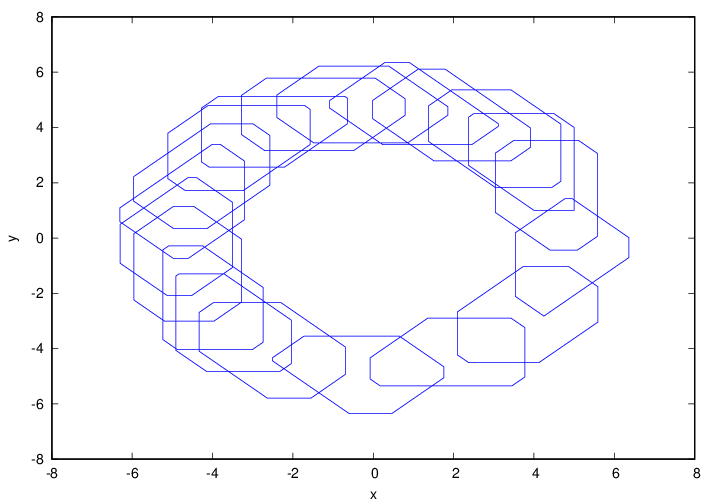

In [38]:
reach.wplot('x', 'y')

In [43]:
load('ULBC.py')

In [44]:
Atomic(2*x + 3*y).dpdt(odes)

3*x - 2*y

In [45]:
Atomic(2*x + 3*y)

Atomic(2*x + 3*y)

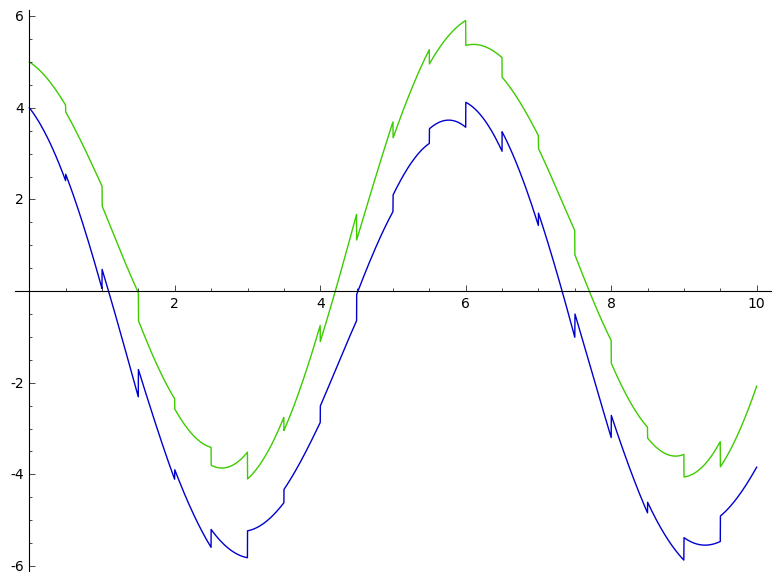

In [46]:
Atomic(x).sage_plot(reach)

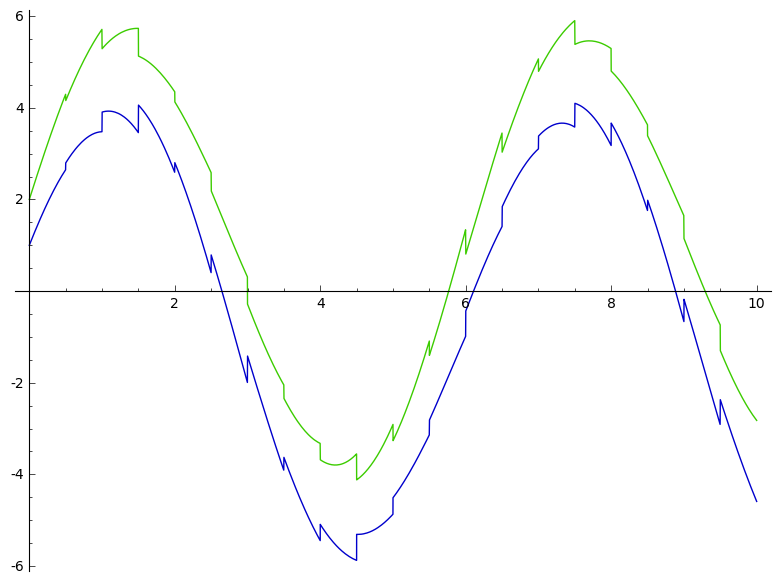

In [47]:
Atomic(y).sage_plot(reach)

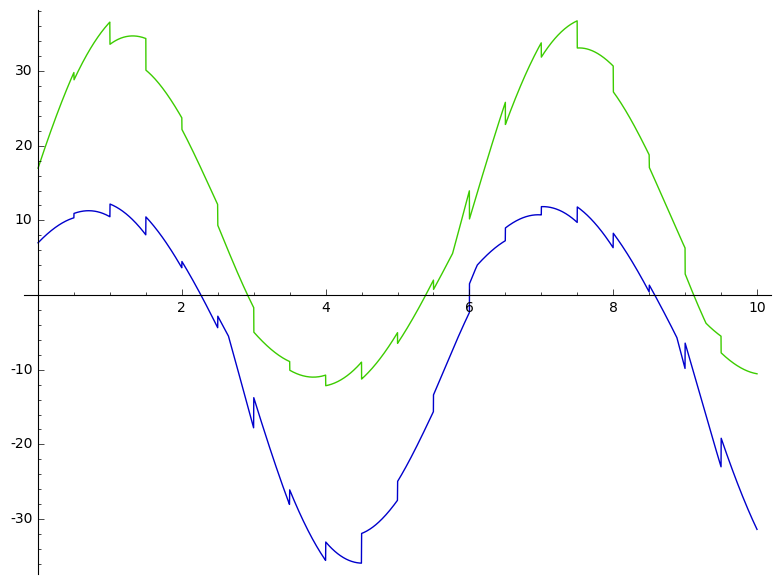

In [48]:
Atomic(x + RIF(3,6)*y).sage_plot(reach)

In [49]:
a = Atomic(2*x + 3*y)

In [50]:
a.vars.values()

[x, y]

In [51]:
vector(map(a.p.derivative, a.vars.values())) * vector(odes)

3*x - 2*y

In [52]:
reach.step

0.5

  I  = [1.5000000000000000 .. 1.8145667261611407]
f(I) = [-0.057032537683868512 .. 5.6950672230361592]
  I  = [4.5000000000000000 .. 4.9067369285790044]
f(I) = [-6.5227980369390189 .. 0.049015654326399983]
  I  = [7.5000000000000000 .. 7.9972970594764954]
f(I) = [-0.091595187469012629 .. 7.2199767532931905]
  I  = [8.0000010000000010 .. 8.1247768086111059]
f(I) = [-0.013927287426248381 .. 3.2299322900874650]
  I  = [8.1247778086111068 .. 8.1257778086111081]
f(I) = [-0.0079922951425879241 .. 2.5715657045625946]


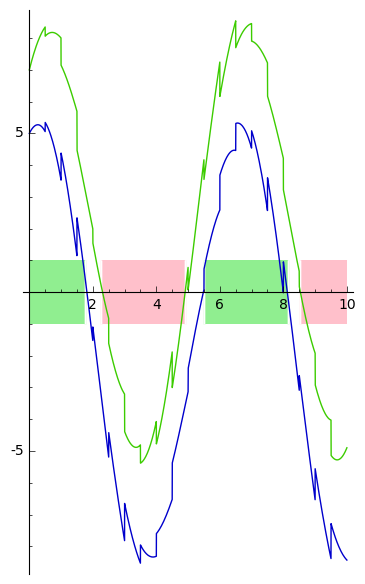

In [54]:
Atomic(x + y).sage_plot(reach) + Atomic(x + y).signal(reach, odes).plot()

# Tests

## Example 1: Simple

In [56]:
R.<x,y> = RIF[]